Модель авторегрессии использует методы регрессии и полагается на уже известную нам автокорреляцию.

## **Авторегрессионная модель** — это модель временных рядов, которая описывает, как прошлые значения временного ряда влияют на его текущее значение. Как можно понять из значений частей слова, авторегрессия представляет собой линейную регрессию на себя.

В контексте прогнозирования временных рядов авторегрессионное моделирование будет означать создание модели, в которой переменная $Y$ будет зависеть от предыдущих значений $Y$ с заранее определённой постоянной задержкой во времени. Временной лаг может быть ежедневным (или два, три, четыре дня и т. д.), еженедельным, ежемесячным и т. п.

Модели AR *(autoregressive models)* можно использовать для моделирования всего, что имеет некоторую степень автокорреляции, то есть имеет корреляцию между наблюдениями на соседних временных шагах. Наиболее распространённый вариант применения этого типа моделирования — цены на фондовом рынке, где сегодняшняя цена ($t$) сильно коррелирует с ценой вчера ($t-1$).

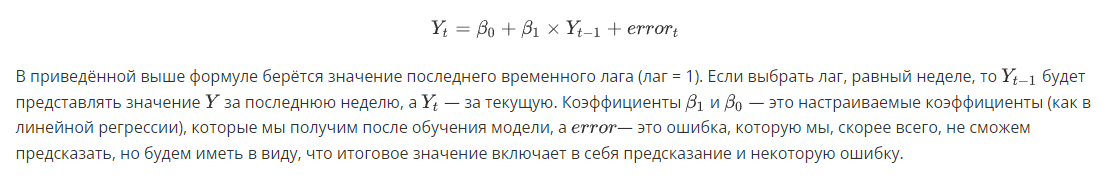

Модель, в которой для расчёта следующего значения используется только предыдущее, называется **моделью первого порядка**, или **AR(1)**.

Давайте разберёмся с концепцией модели AR на примере следующего графика:

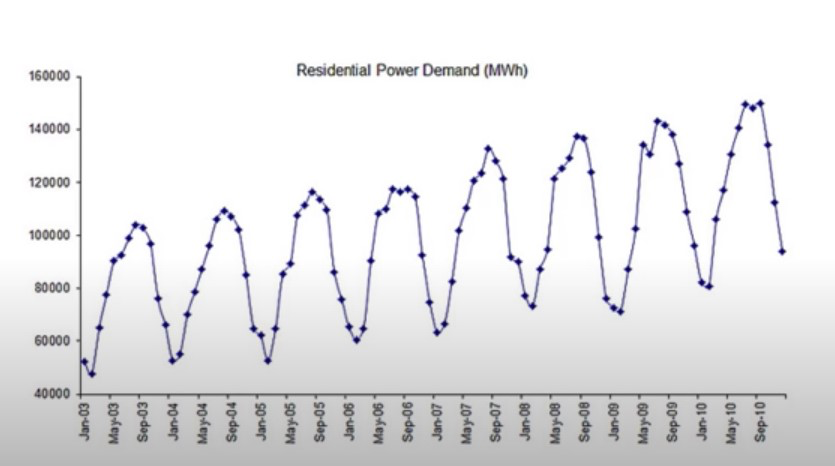

Здесь представлена динамика потребления электроэнергии в жилых домах в разные месяцы с 2003 по 2010 год.

Задача — спрогнозировать потребление на ближайшие месяцы, используя имеющиеся данные.

При временном лаге в один месяц модель AR(1), или модель AR первого порядка, будет выглядеть следующим образом:

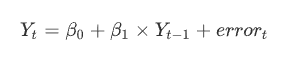

Модель AR второго порядка будет рассчитывать значение переменной в любое конкретное время в зависимости от значений последних двух задержек. Таким образом, модель AR(2) будет выглядеть следующим образом:

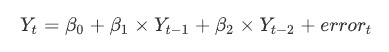

1 и 2 в AR(1) и AR(2) — это параметр, который обозначается как *p*. Таким образом, обобщённая формула для AR-модели с параметром p будет выглядеть следующим образом:

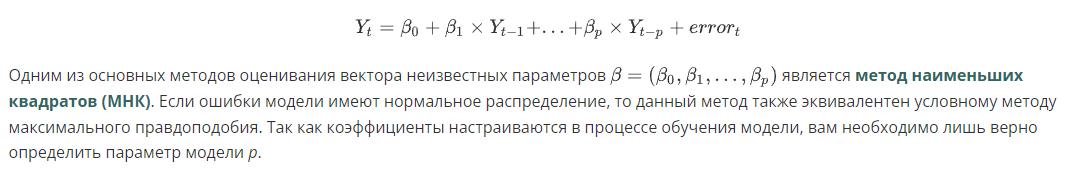

С методом наименьших квадратов мы уже знакомились, когда изучали линейную регрессию в модуле MATH&ML-2.

# КАК ВЫБИРАТЬ P?

В предыдущем юните мы познакомились с автокорреляцией и частичной автокорреляцией. Для определения значения p будем использовать график частичной автокорреляции — будем обращать внимание на последний лаг, сильно отличный от нуля, при условии, что ряд стационарный.

Давайте научимся определять p. Перед нами график частичной автокорреляции (pacf). Нам необходимо найти последний лаг, отличный от нуля. В данном случае такими лагами являются лаги 1, 2, 3, 4. Остальные лаги колеблются в районе нуля. Поэтому на этом графике выберем p=4.

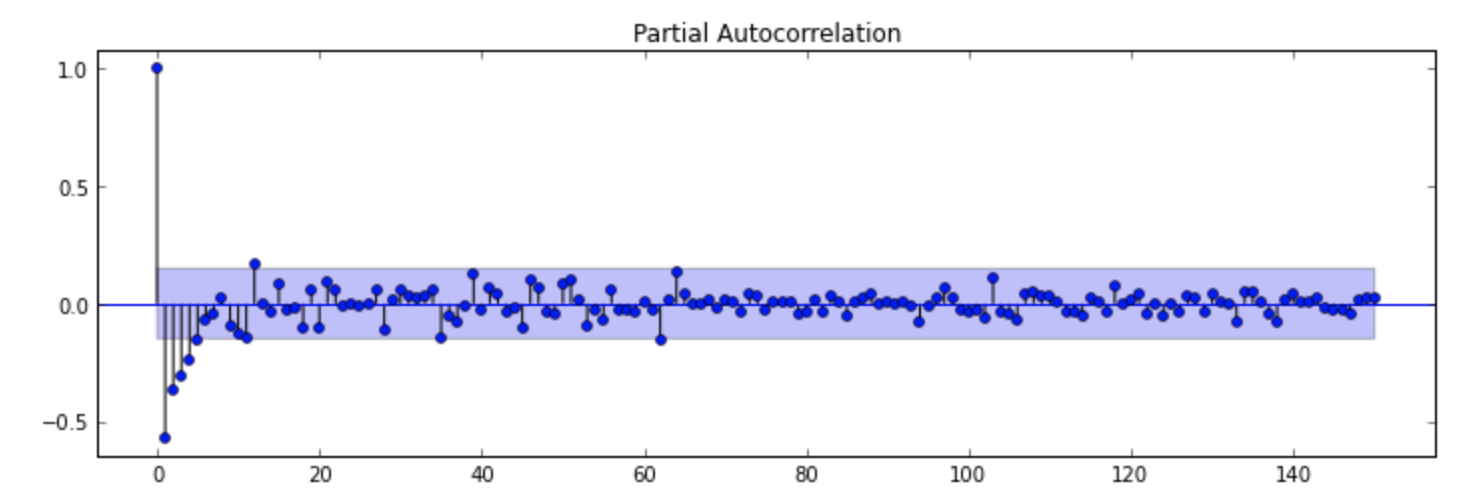

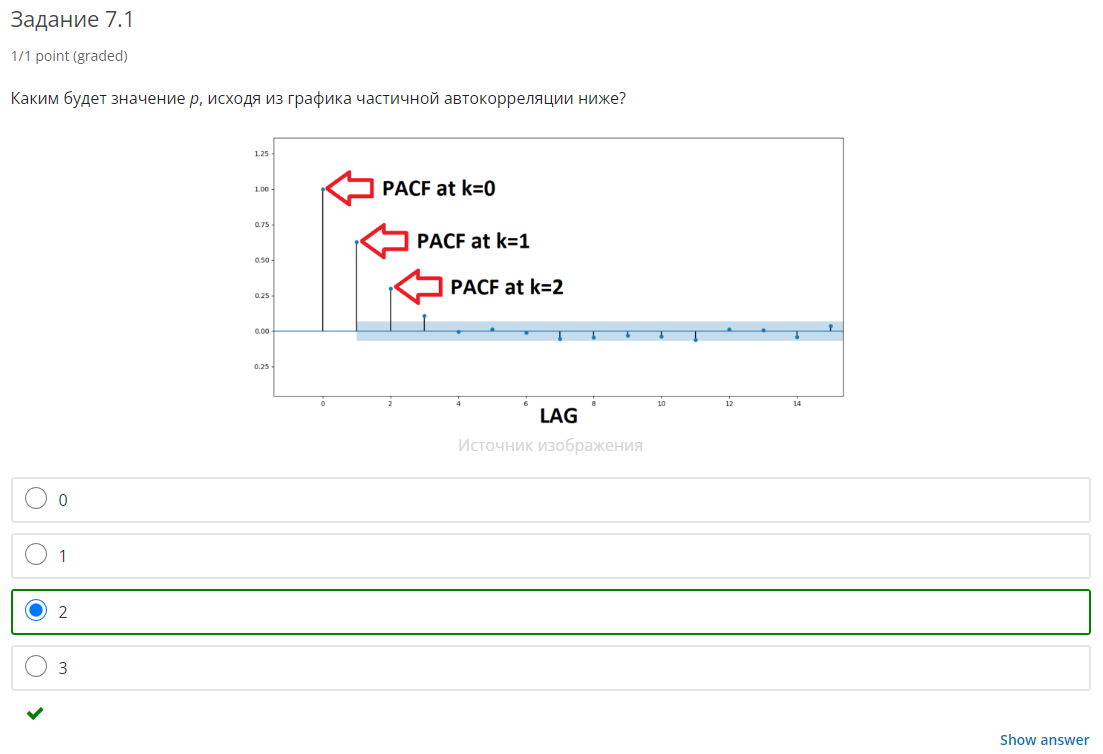

Обратите внимание на следующий график:

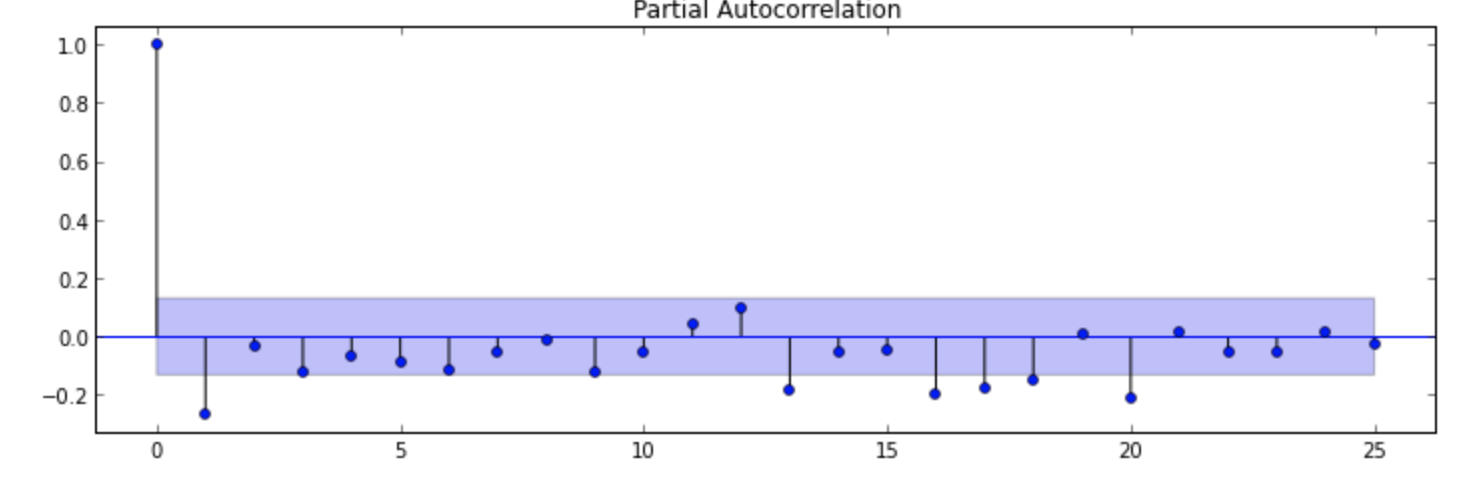

Здесь p будет равно 1, так как сильнее всего от нуля отличен первый лаг. Но если у вас возникают сомнения, вы можете проверить модель с разными параметрами и выбрать лучшую.

# AR-МОДЕЛИРОВАНИЕ НА PYTHON

Для загрузки класса ar_model.AutoReg, который применяется для обучения одномерной авторегрессионной модели порядка p, используется пакет statsmodels.tsa.

Ниже приведены некоторые из ключевых шагов, которые необходимо выполнить для обучения AR-модели:

1. Отобразить временной ряд.
2. Проверить ряд на стационарность (модель AR можно применять только к стационарному временному ряду).
3. Выбрать параметр p (порядок модели AR).
4. Обучить модель.

Все эти шаги вы будете выполнять в итоговой практике, а пока давайте перейдём к самому инструменту моделирования.

Применим авторегрессионную модель к датасету по производству возобновляемой энергии в Германии. Набор данных включает общую информацию о потреблении электроэнергии в стране, а также о производстве ветровой и солнечной энергии за 2006–2017 годы.

Признаки в данных:

+ Date — дата (в формате гггг-мм-дд);
+ Consumption — потребление электроэнергии (ГВтч);
+ Wind — производство ветровой энергии (ГВтч);
+ Solar — производство солнечной энергии (ГВтч);
+ Wind+Solar — сумма производства ветровой и солнечной энергии (ГВтч).

В качестве примера построим предсказание объёма потребления электроэнергии на три месяца (возьмём последние 100 дней).

Импортируем необходимые библиотеки и загрузим датасет с данными.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=",")

При использовании статистических моделей временные ряды нельзя делить на обучающую и тестовую выборки случайным образом. Так как нам важно сохранять последовательность, разделим данные на обучающую и тестовую выборки упорядоченно, то есть возьмём в качестве тестовой выборки последние 100 значений. Остальные данные будем использовать для обучения.

In [3]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

Инициализируем и обучим модель. Возьмём lags=8 (AR(8)) — на практике же будем определять это значение по графику частичной автокорреляции:

In [4]:
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())


                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Wed, 26 Apr 2023   AIC                          48483.625
Time:                        16:57:16   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

Сделаем предсказание. Метод predict требует два обязательных параметра — метки начала и окончания предсказания. Метка начала предсказания будет равна количеству данных в обучающей выборке, так как нас интересует прогноз со следующего дня. Метка окончания в нашем случае будет равна len(train_data)+100, что эквивалентно len(df)-1, так как len(df) = len(train_data) + len(test_data).

In [5]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

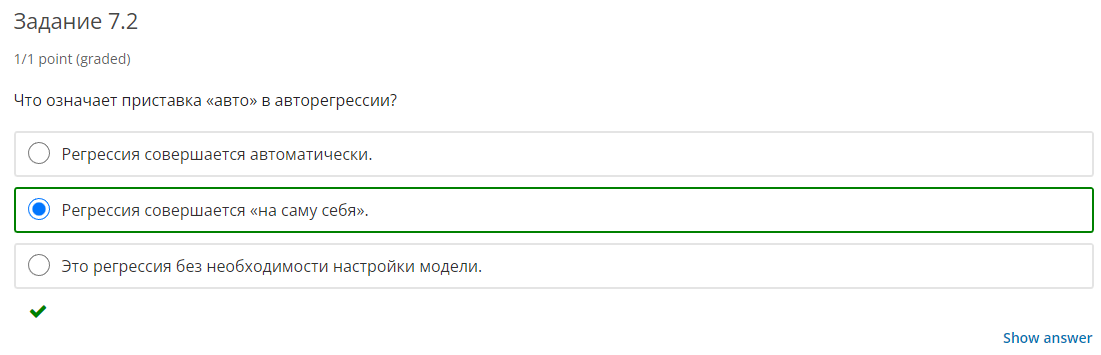

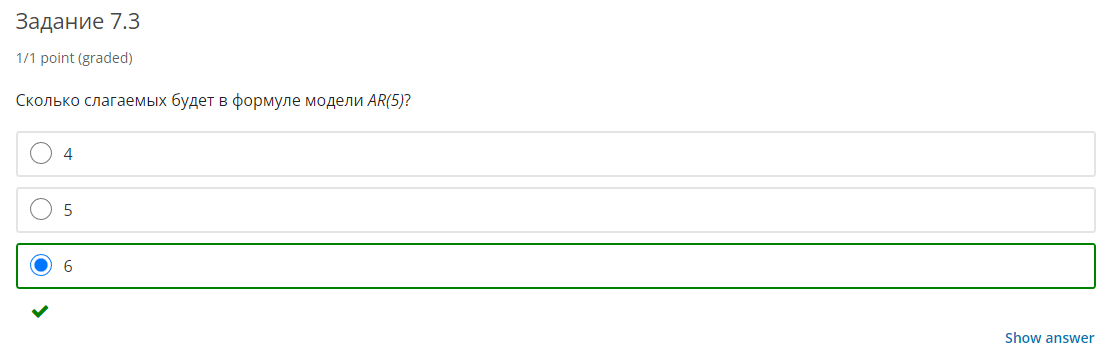

Существуют и альтернативные AR-методы прогнозирования временных рядов:

+ МА (скользящее среднее),
+ ARMA (авторегрессионное скользящее среднее),
+ ARIMA (авторегрессионное интегрированное скользящее среднее),
+ SARIMA (сезонное авторегрессионное интегрированное скользящее среднее),
+ VAR (векторная авторегрессия),
+ VARMA (скользящее среднее векторной авторегрессии),
+ SES (простое экспоненциальное сглаживание, которое мы рассмотрели в юните 4).

В следующем модуле мы рассмотрим самые известные методы прогнозирования, а сейчас самое время закрепить полученные знания на практике →